In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd

# Modelo simple de regresion

In [3]:
X =pd.read_csv("C:/Users/sergi/modalidad/Dataset/X.csv", encoding = 'utf-8')

In [4]:
X

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380.0,1642888.0,20.0,2018.0,1507.0,4.0,9.0,15.0,1.0,1.0,1.0
1,-75.592022,6.279157,557526.0,1620950.0,21.0,2018.0,715.0,3.0,3.0,7.0,1.0,1.0,2.0
2,-75.595882,6.275555,674912.0,1640270.0,30.0,2018.0,717.0,4.0,8.0,7.0,2.0,2.0,1.0
3,-75.567284,6.248271,674286.0,1641770.0,10.0,2018.0,1019.0,1.0,9.0,10.0,2.0,2.0,1.0
4,-75.576195,6.213677,681701.0,1645768.0,12.0,2018.0,1419.0,5.0,10.0,14.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35467,-75.557681,6.263142,719236.0,1666784.0,10.0,2019.0,409.0,3.0,4.0,4.0,1.0,1.0,4.0
35468,-75.558421,6.232295,735811.0,1680406.0,1.0,2019.0,913.0,4.0,8.0,9.0,1.0,3.0,6.0
35469,-75.563815,6.301392,740535.0,1685787.0,5.0,2019.0,502.0,4.0,9.0,5.0,1.0,1.0,1.0
35470,-75.566617,6.243250,711309.0,1668093.0,23.0,2019.0,1013.0,2.0,4.0,10.0,1.0,1.0,6.0


In [5]:
X.shape

(35472, 13)

In [6]:
y = X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,11,12]], axis='columns')
y.head(5)

,NUM_GRAVEDAD
0,1.0
1,1.0
2,2.0
3,2.0
4,2.0


In [7]:
X = X.drop(X.columns[[8]], axis='columns')
print(X)

               X         Y  OBJECTID   RADICADO   DIA  PERIODO    CBML  \
0     -75.578357  6.213719  673380.0  1642888.0  20.0   2018.0  1507.0   
1     -75.592022  6.279157  557526.0  1620950.0  21.0   2018.0   715.0   
2     -75.595882  6.275555  674912.0  1640270.0  30.0   2018.0   717.0   
3     -75.567284  6.248271  674286.0  1641770.0  10.0   2018.0  1019.0   
4     -75.576195  6.213677  681701.0  1645768.0  12.0   2018.0  1419.0   
...          ...       ...       ...        ...   ...      ...     ...   
35467 -75.557681  6.263142  719236.0  1666784.0  10.0   2019.0   409.0   
35468 -75.558421  6.232295  735811.0  1680406.0   1.0   2019.0   913.0   
35469 -75.563815  6.301392  740535.0  1685787.0   5.0   2019.0   502.0   
35470 -75.566617  6.243250  711309.0  1668093.0  23.0   2019.0  1013.0   
35471 -75.559189  6.240963  720466.0  1668186.0  23.0   2019.0   907.0   

       DIA_SEMANA  NUM_COMUNA  NUM_GRAVEDAD  NUM_DISENO  NUM_CLASE  
0             4.0        15.0           1.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.4)

In [9]:
print(len(X))
print(f'60 % de los datos es {len(X_train)}')
print(f'40 % de los datos es {len(X_test)}')

35472
60 % de los datos es 21283
40 % de los datos es 14189


In [10]:
X.head(1)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380.0,1642888.0,20.0,2018.0,1507.0,4.0,15.0,1.0,1.0,1.0


# Regresion Lasso

In [11]:
from sklearn.linear_model import Lasso

model = Lasso()

In [12]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
predicted = model.predict(X_test)

In [14]:
predicted

array([1.47458391, 1.47452072, 1.47526675, ..., 1.47540546, 1.47681524,
       1.47386703])

In [15]:
predicted.shape

(14189,)

# Distribucion geometrica

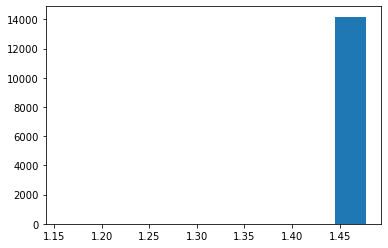

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted]);


La gravedad 1 y 2 son las mas concurrentes

Debemos evaluar de forma más fina el comportamiento de nuestro modelo.

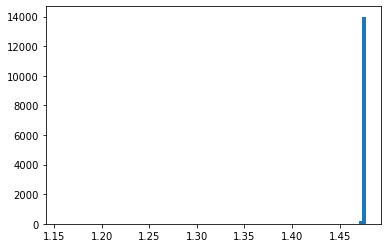

In [17]:
plt.hist([predicted], bins=90);

# Evaluando de forma más fina el comportamiento de nuestro modelo

El score r2 entre mas cercano al 1 es mejor, podemos entender su poder predictivo

In [18]:
model.score(X_test, y_test)

-2.8510321617769563e-05

Muy bueno el Score para un primer modelo

In [19]:
y_test.shape

(14189, 1)

In [20]:
predicted=predicted.reshape(14189,1)

In [21]:
residuals = y_test - predicted

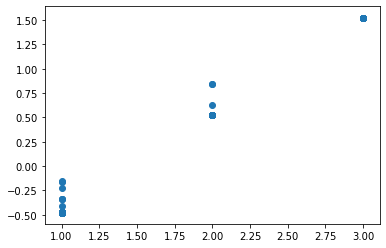

In [22]:
plt.scatter(y_test,residuals)

Errores porcentajes

In [23]:
ap_residuals = np.abs(residuals)/ y_test

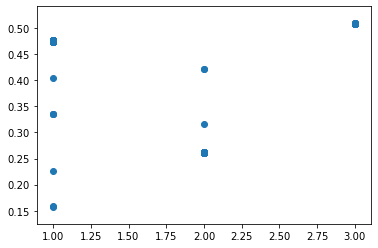

In [24]:
plt.scatter(y_test,ap_residuals)

Aplicando una escala logaritmica

In [25]:
lap_residuals = np.log(ap_residuals)
lap_residuals

,NUM_GRAVEDAD
11222,-0.745317
16518,-0.745450
25966,-0.743879
14878,-0.744060
4156,-0.746249
...,...
4850,-1.337364
30379,-0.740648
4898,-0.743587
23423,-1.340968


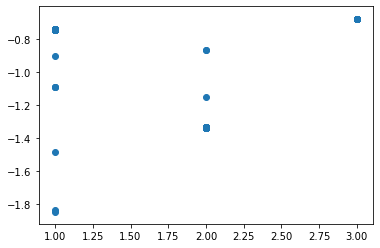

In [26]:
plt.scatter(y_test,lap_residuals)